# Test CODS algorithm on same synthetic datasets as in Skomedal & Deceglie (2020) (Paper I)

- We have, first, generated six different synthetic performance index (PI) time series following the specifications in table II from Paper I. This datasets have been generetad using [this code](https://github.com/asmunds/simulate_pv_time_series). (This data can be found in the drive folder - please see `data/CODS/`)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import rdtools
import time
import pickle

## Visualize synthetic datasets

In [5]:
models = ["a", "b", "c", "d", "e", "f"]
df     = {}
for m in models:
    path_to_pkl = "../data/raw/CODS/synthetic_" + m
    df[m] = pd.read_pickle(path_to_pkl)

/home/maria/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


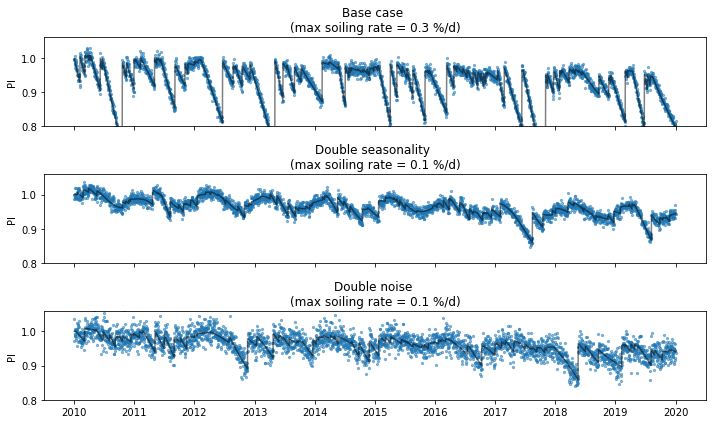

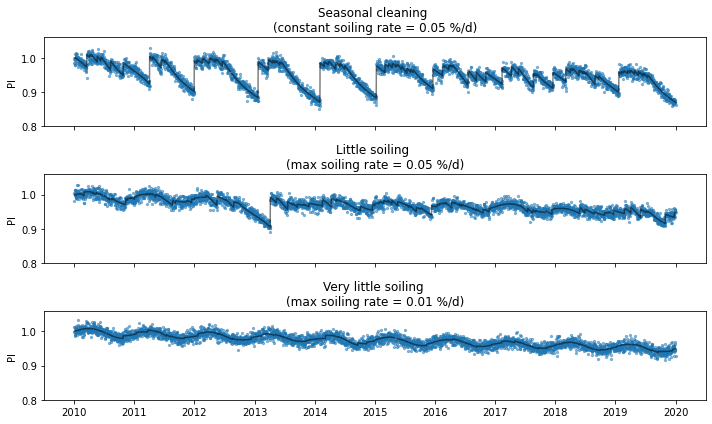

In [6]:
names = ['Base case \n(max soiling rate = 0.3 %/d)',
         'Double seasonality \n(max soiling rate = 0.1 %/d)',
         'Double noise \n(max soiling rate = 0.1 %/d)',
         'Seasonal cleaning \n(constant soiling rate = 0.05 %/d)',
         'Little soiling \n(max soiling rate = 0.05 %/d)',
         'Very little soiling \n(max soiling rate = 0.01 %/d)']
N = len(names)
spn = 5 if N in [5, 9, 10] else (3 if N in [6] else 4)
plt.close('all')
for i in range(N):
    if i%spn==0: fig, ax = plt.subplots(spn, 1, figsize=(10,6), sharex=True) 
    ax[i%spn].scatter(df[models[i]].index, df[models[i]].daily_norm, 5, alpha=.5)
    ax[i%spn].plot(df[models[i]].index, df[models[i]].PI_no_noise, 'k', alpha=.5)
    ax[i%spn].set_ylim(.8,1.06)
    ax[i%spn].set_ylabel('PI')
    ax[i%spn].set_title(names[i])
    plt.tight_layout()

In [7]:
df["a"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2010-01-01 to 2020-01-01
Freq: D
Data columns (total 11 columns):
day                3653 non-null int64
noise              3653 non-null float64
seasonality        3653 non-null float64
degradation        3653 non-null float64
soiling            3653 non-null float64
cleaning_events    0 non-null object
soiling_rate       3653 non-null float64
PI_no_noise        3653 non-null float64
PI_no_soil         3653 non-null float64
PI_no_degrad       3653 non-null float64
daily_norm         3653 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 342.5+ KB


In [8]:
df["a"].head()

,day,noise,seasonality,degradation,soiling,cleaning_events,soiling_rate,PI_no_noise,PI_no_soil,PI_no_degrad,daily_norm
2010-01-01,0,0.999480,1.000000,1.000000,0.997833,NaN,0.002167,0.997833,0.999480,0.997833,0.997314
2010-01-02,1,0.998888,1.000172,0.999986,0.995666,NaN,0.002167,0.995823,0.999046,0.995837,0.994716
2010-01-03,2,1.010418,1.000344,0.999973,0.993498,NaN,0.002167,0.993813,1.010738,0.993840,1.004166
2010-01-04,3,0.987433,1.000516,0.999959,0.991331,NaN,0.002167,0.991802,0.987901,0.991843,0.979338
2010-01-05,4,1.007454,1.000688,0.999945,0.989164,NaN,0.002167,0.989790,1.008091,0.989844,0.997168


## Run CODS algorithm

### Synthetic dataset (a) Base case (max soiling rate = 0.3 %/d)

**Estimate degradation rate with year-on-year (yoy) method** 

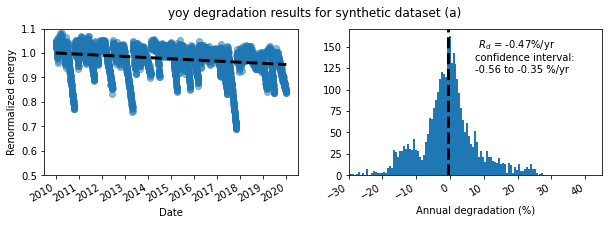

In [11]:
daily = df["a"].daily_norm

yoy_rd, yoy_ci, yoy_info = rdtools.degradation_year_on_year(daily, confidence_level=68.2)


# Visualize the results
degradation_fig = rdtools.degradation_summary_plots(
    yoy_rd, yoy_ci, yoy_info, daily,
    summary_title='yoy degradation results for synthetic dataset (a)',
    scatter_ymin=0.5, scatter_ymax=1.1,
    hist_xmin=-30, hist_xmax=45, bins=100
)

**Soiling loss profile using the stochastic rate and recovery (SRR) method [1]**

[1] "M. G. Deceglie, L. Micheli and M. Muller, "Quantifying Soiling Loss Directly From PV Yield," IEEE Journal of Photovoltaics, vol. 8, no. 2, pp. 547-551, March 2018. doi: 10.1109/JPHOTOV.2017.2784682"

In [14]:
# Since daily isolation was required this has not been developed yet!

**CODS method for esimating degradation rates (DR) and soiling losses**

In [15]:
# TODO CODS is sensitive to outliers. Therefore, in principle, we need to include an intermediate step of outlier 
# filtering before the algorithm is run

In [16]:
# Initialize a CODS instance
cods_instance = rdtools.soiling.cods_analysis(daily)

In [ ]:
# Run CODS
start_time = time.time()
cods_instance.run_bootstrap(512, verbose=True)
end_time = time.time()
print("--- %s min ---" %((end_time - start_time)/60.))

Initially fitting 16 models
# 16 | Used: 3.6 min | Left: 0.0 min | Progress: [----------------------------->] 100 %
            order    dt        pt     ff      RMSE     SR==1   weights    sss
0   [SR, SC, Rd]  0.25  0.666667   True  0.009411  0.135505  0.062686  False
1   [SR, SC, Rd]  0.25  0.666667  False  0.009374  0.120175  0.063796  False
2   [SR, SC, Rd]  0.25  1.500000   True  0.009519  0.174925  0.059892  False
3   [SR, SC, Rd]  0.25  1.500000  False  0.009483  0.162606  0.060761  False
4   [SR, SC, Rd]  0.75  0.666667   True  0.009347  0.117711  0.064122  False
5   [SR, SC, Rd]  0.75  0.666667  False  0.009344  0.116616  0.064203  False
6   [SR, SC, Rd]  0.75  1.500000   True  0.009417  0.121818  0.063407  False
7   [SR, SC, Rd]  0.75  1.500000  False  0.009417  0.121818  0.063407  False
8   [SC, SR, Rd]  0.25  0.666667   True  0.009436  0.154667  0.061479  False
9   [SC, SR, Rd]  0.25  0.666667  False  0.009375  0.145634  0.062371  False
10  [SC, SR, Rd]  0.25  1.500000   T

In [ ]:
# save results & load results
filename = "cods_instance_a.pkl"
pickle.dump(cods_instance , filename)
test = pickle.load(filename)

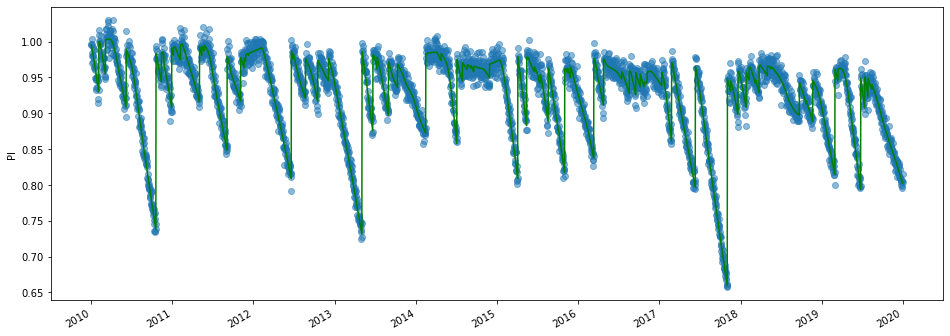

In [20]:
result_df      = cods_instance.result_df
cods_model_fit = result_df.total_model

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(daily.index, daily, 'o', alpha = 0.5)
ax.plot(cods_model_fit.index, cods_model_fit, color='g')
#ax.set_ylim(0,1.25)
fig.autofmt_xdate()
ax.set_ylabel("PI");

In [21]:
cods_degradation = cods_instance.degradation
print('The P50 degradation rate is {:.2f} %/yr'.format(cods_degradation[0]))
print('The 95 % confidence interval is ({:.2f}, {:.2f}) %/yr'.format(cods_degradation[1], cods_degradation[2]))

The P50 degradation rate is -0.45 %/yr
The 95 % confidence interval is (-0.55, -0.29) %/yr
